In [29]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

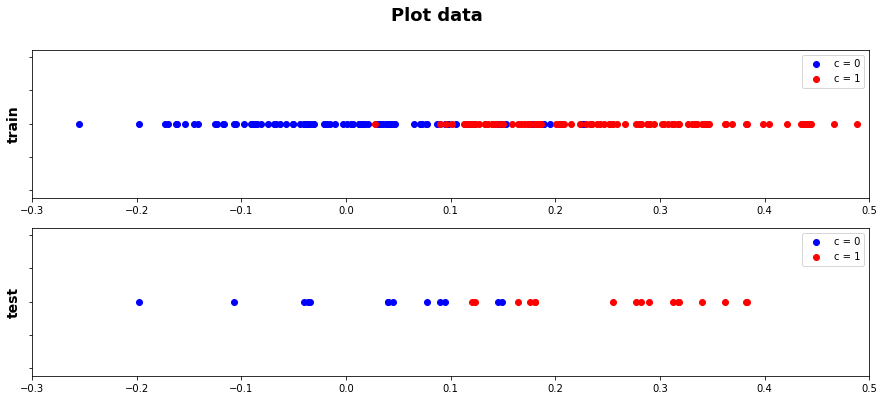

In [37]:
def Read_data(address):
    pos, x, y = np.loadtxt(address, delimiter=',', skiprows=1, unpack=True)
    pos, y = pos.astype('uint8'), y.astype('uint8')
    x0, x1 = x[y==0], x[y==1]
    pos0, pos1 = pos[y==0], pos[y==1]
    return pos0, x0, pos1, x1

def plot_data(x0, x1, title, position):
    ax = plt.subplot(2, 1, position)
    ax.set_xlim(-0.3, 0.5)
    ax.set_yticklabels([])
    plt.ylabel(title, fontsize=14, fontweight='bold')
    plt.scatter(x0, len(x0)*[0], color='blue', label='c = 0')
    plt.scatter(x1, len(x1)*[0], color='red', label='c = 1')
    ax.legend()

pos0_train, x0_train, pos1_train, x1_train = Read_data('inputs/data.csv')
pos0_test, x0_test, pos1_test, x1_test = Read_data('inputs/test.csv')
fig = plt.figure(figsize=(15, 6))
plt.suptitle('Plot data', fontsize=18, fontweight='bold')
plot_data(x0_train, x1_train, 'train', 1)
plot_data(x0_test, x1_test, 'test', 2)
plt.show()

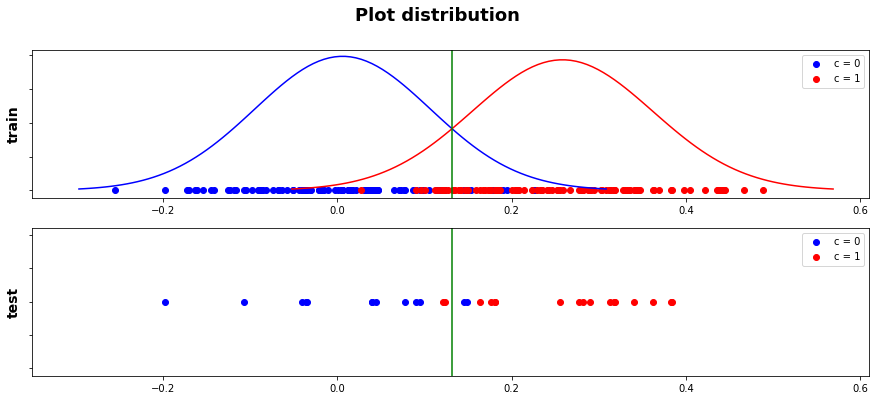

Test accuracy = 86.67%
decision_boundary value: 0.13


In [74]:
def decision_boundary(m1, v1, m2, v2): # Find one-dim boundary decision given two gaussian distribution parameters.
    s1, s2 = np.sqrt(v1), np.sqrt(v2)
    
    a = v2 - v1
    b = 2 * ((m2 * v1) - (m1 * v2))
    c = ((m1 * s1) ** 2) - ((m2 * s1) ** 2) - (2 * np.log(s2 / s1) * v1 * v2)
    
    if a == 0 and b != 0:
        return 'zero', (-c / b)
    
    delta = (b ** 2) - (4 * a * c)
    
    if a == 0:
        return 'zero', -c / b
    
    if delta < 0:
        return 'negative', None
    if delta == 0:
        return 'zero', (-b / (2 * a))
    else:
        return 'positive', (((-b + np.sqrt(delta)) / (2 * a)), ((-b - np.sqrt(delta)) / (2 * a)))
    

def plot_distribution(x0, x1, title, position, xlim, pdf=False, boundary=False, boundary_pos=0):
    ax = plt.subplot(2, 1, position)
    ax.set_xlim(xlim[0], xlim[1])
    ax.set_yticklabels([])
    plt.ylabel(title, fontsize=14, fontweight='bold')
    plt.scatter(x0, len(x0)*[0], color='blue', label='c = 0')
    plt.scatter(x1, len(x1)*[0], color='red', label='c = 1')
    ax.legend()
    
    m0, v0 = x0.mean(), x0.var()
    m1, v1 = x1.mean(), x1.var()
    if pdf is True:
        for m, v, c in zip((m0, m1), (v0, v1), ('blue', 'red')):
            s = np.sqrt(v)
            x = np.linspace(m - 3*s, m + 3*s, 100)
            plt.plot(x, norm.pdf(x, m, s), color=c)
    if boundary is True:
        plt.axvline(x=boundary_pos, color='green')

m0, v0 = x0_train.mean(), x0_train.var()
m1, v1 = x1_train.mean(), x1_train.var()
delta_state, x = decision_boundary(m0, v0, m1, v1)
boundary_pos = x[0]
fig = plt.figure(figsize=(15, 6))
plt.suptitle('Plot distribution', fontsize=18, fontweight='bold')
plot_distribution(x0_train, x1_train, 'train', 1, (-0.35, 0.61), pdf=True, boundary=True, boundary_pos=boundary_pos)
plot_distribution(x0_test, x1_test, 'test', 2, (-0.35, 0.61), boundary=True, boundary_pos=boundary_pos)
plt.show()
acc = (len(x0_test[x0_test < boundary_pos]) + len(x1_test[x1_test > boundary_pos])) / (len(x0_test) + len(x1_test)) * 100
acc = round(acc, 2)
print('Test accuracy = {0}%'.format(acc))
print('decision_boundary value:', round(boundary_pos, 2))